In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [165]:
class LogisticRegression():
    def __init__ (self):
        self.theta = None
        
        self.history = {
            'loss': []
        }
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X, expand=True):
        if expand:
            m = X.shape[0]
            b = np.ones(m)
            X = np.c_[b, X]
        return self.sigmoid(np.sum(X * self.theta, axis=1))
    
    def cost(self, y_, y, m):
        return -np.sum( y * np.log(y_) + (1 - y) * np.log(1 - y_)) / m
    
    def fit(self, X, y, alpha=0.1, epoch=100):
        m, n = X.shape
        self.theta = np.zeros((n + 1, ))
        
        b = np.ones(m)
        X = np.c_[b, X]
        
        for i in xrange(epoch):
            y_ = self.predict(X, False)
            
            loss = self.cost(y_, y, m)
            print 'epoch =', i, 'loss =', loss
            self.history['loss'].append(loss)
            
            update_theta = np.dot((y_ - y), X) / m
            self.theta -= alpha * update_theta

In [166]:
# a bad way to create random data, but it works :)
def genData():
    X = np.random.random((100, 2))

    consts = np.random.randn(3)

    b = np.ones(X.shape[0])
    X_ = np.c_[b, X]

    val = np.sum(X_ * consts, axis=1)
    act = (val - val.mean()) / (val.max() - val.min()) 

    y = []
    for i in act:
        if i > 0: y.append(1)
        else: y.append(0)
    return X, np.array(y)

In [167]:
X, y = genData()

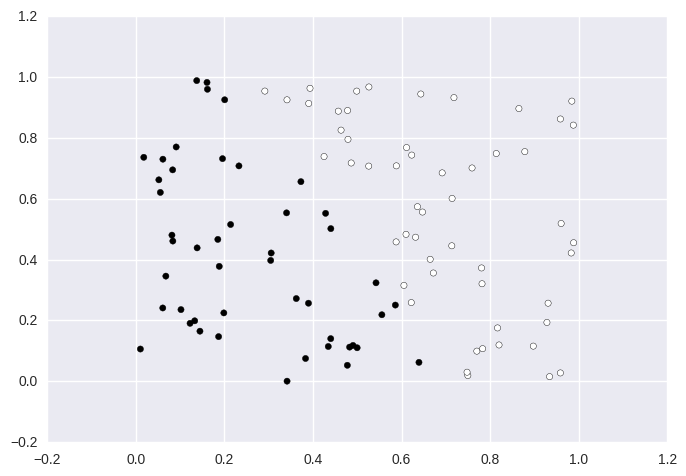

In [168]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [169]:
clf = LogisticRegression()

In [170]:
clf.fit(X, y, alpha=1)

epoch = 0 loss = 0.69314718056
epoch = 1 loss = 0.676124798677
epoch = 2 loss = 0.664094161596
epoch = 3 loss = 0.654147402315
epoch = 4 loss = 0.645158844107
epoch = 5 loss = 0.636687934605
epoch = 6 loss = 0.628558113307
epoch = 7 loss = 0.62069550147
epoch = 8 loss = 0.613066564175
epoch = 9 loss = 0.60565378826
epoch = 10 loss = 0.598446120476
epoch = 11 loss = 0.591435188507
epoch = 12 loss = 0.584613802495
epoch = 13 loss = 0.577975359678
epoch = 14 loss = 0.57151360737
epoch = 15 loss = 0.565222548046
epoch = 16 loss = 0.559096400553
epoch = 17 loss = 0.553129583233
epoch = 18 loss = 0.547316705418
epoch = 19 loss = 0.541652561958
epoch = 20 loss = 0.536132128712
epoch = 21 loss = 0.530750558243
epoch = 22 loss = 0.525503175447
epoch = 23 loss = 0.520385473051
epoch = 24 loss = 0.515393106992
epoch = 25 loss = 0.510521891692
epoch = 26 loss = 0.505767795272
epoch = 27 loss = 0.501126934733
epoch = 28 loss = 0.496595571134
epoch = 29 loss = 0.492170104783
epoch = 30 loss = 0.4878

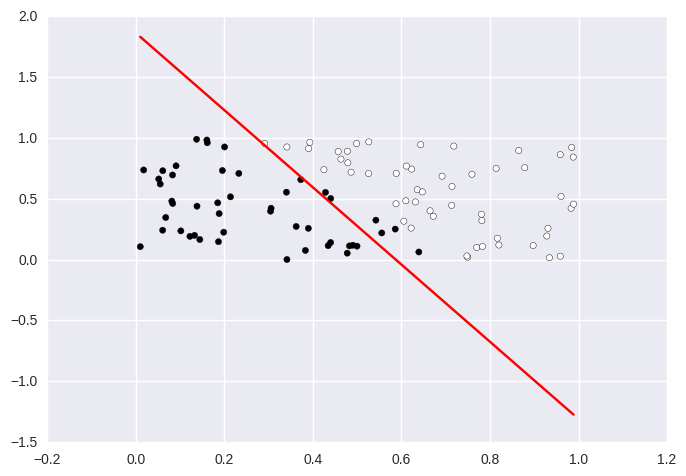

In [171]:
theta = clf.theta
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = -(theta[0] + theta[1] * x1) / theta[2]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1, x2, color='r')
plt.show()

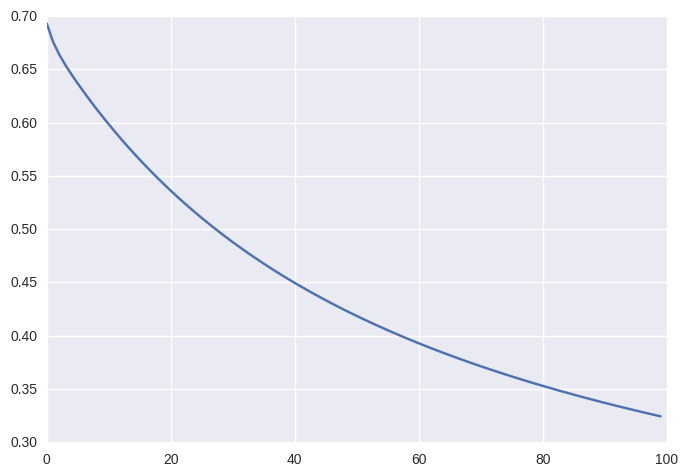

In [172]:
loss = clf.history['loss']
plt.plot([i for i in xrange(100)], loss)
plt.show()